<a href="https://colab.research.google.com/github/Ogneev/Diabetes-Mellitus-Prediction/blob/main/Diabetes_prediction_using_Another_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df=pd.read_csv('/content/diabetes_data_upload.csv')
print(df.columns)
df.head()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [110]:
df = df.replace({'Gender': {'Male': 1,'Female': 0}})
df = df.replace({'Polyuria': {'Yes': 1,'No': 0}})
df = df.replace({'Polydipsia': {'Yes': 1,'No': 0}})
df = df.replace({'sudden weight loss': {'Yes': 1,'No': 0}})
df = df.replace({'weakness': {'Yes': 1,'No': 0}})
df = df.replace({'Polyphagia': {'Yes': 1,'No': 0}})
df = df.replace({'Genital thrush': {'Yes': 1,'No': 0}})
df = df.replace({'visual blurring': {'Yes': 1,'No': 0}})
df = df.replace({'Itching': {'Yes': 1,'No': 0}})
df = df.replace({'Irritability': {'Yes': 1,'No': 0}})
df = df.replace({'delayed healing': {'Yes': 1,'No': 0}})
df = df.replace({'partial paresis': {'Yes': 1,'No': 0}})
df = df.replace({'muscle stiffness': {'Yes': 1,'No': 0}})
df = df.replace({'Alopecia': {'Yes': 1,'No': 0}})
df = df.replace({'Obesity': {'Yes': 1,'No': 0}})
df = df.replace({'class': {'Positive': 1,'Negative': 0}})
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [111]:
#lets describe the data
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [113]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

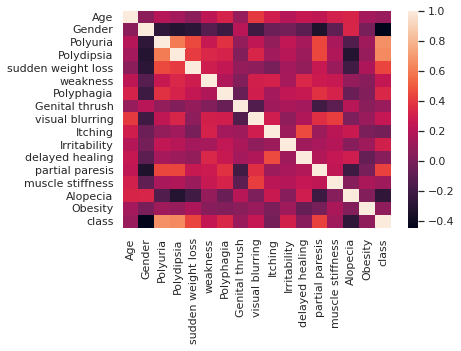

In [114]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

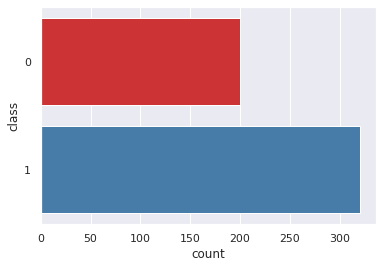

In [115]:
#lets count total outcome in each target 0 1
#0 means no diabetes
#1 means patient with diabetes
sns.countplot(y=df['class'],palette='Set1')

In [121]:
#lets extract features and targets
X=df.drop(columns=['class'])
y=df['class']

In [122]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [123]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((416, 16), (104, 16), (416,), (104,))

In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}


def display_result(result):
    print("TP: ",result['test_tp']
    )
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [125]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]
f1_scr=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 0.9711538461538461	ROC : 0.9718749999999999	F1_score : 0.9763779527559054
TP:  [24 23 23 23 26 26 21 24 24 22]
TN:  [14 16 14 14 15 13 14 16 13 15]
FN:  [2 3 3 3 0 0 4 1 1 3]
FP:  [2 0 2 2 1 3 2 0 3 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [126]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9711538461538461	ROC : 0.9718749999999999	F1_score : 0.9763779527559054
TP:  [24 24 22 23 26 26 22 24 23 22]
TN:  [14 15 14 14 13 12 15 15 14 14]
FN:  [2 2 4 3 0 0 3 1 2 3]
FP:  [2 1 2 2 3 4 1 1 2 2]


In [127]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9711538461538461	ROC : 0.9718749999999999	F1_score : 0.9763779527559054
TP:  [22 22 20 23 22 24 22 22 20 20]
TN:  [14 15 16 15 14 16 14 16 16 14]
FN:  [4 4 6 3 4 2 3 3 5 5]
FP:  [2 1 0 1 2 0 2 0 0 2]


In [128]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 1.0	ROC : 1.0	F1_score : 1.0
TP:  [25 26 25 26 26 26 25 24 25 24]
TN:  [16 16 16 15 16 15 16 16 15 15]
FN:  [1 0 1 0 0 0 0 1 0 1]
FP:  [0 0 0 1 0 1 0 0 1 1]


In [129]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9711538461538461	ROC : 0.9671875	F1_score : 0.9767441860465116
TP:  [22 24 21 22 26 26 23 23 21 20]
TN:  [13 14 15 14 13 12 13 13 12 14]
FN:  [4 2 5 4 0 0 2 2 4 5]
FP:  [3 2 1 2 3 4 3 3 4 2]


In [130]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

print("\nAccuracy : {0}\tROC : {1}\tF1_score : {2}".format(ac,rc,f1score))

display_result(result)
f1_scr.append(f1score)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 1.0	ROC : 1.0	F1_score : 1.0
TP:  [25 26 25 26 26 26 24 24 25 23]
TN:  [16 14 15 15 16 15 16 16 15 15]
FN:  [1 0 1 0 0 0 1 1 0 2]
FP:  [0 2 1 1 0 1 0 0 1 1]


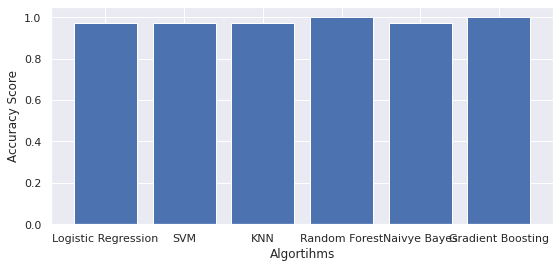

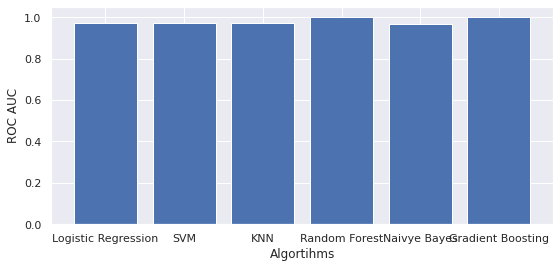

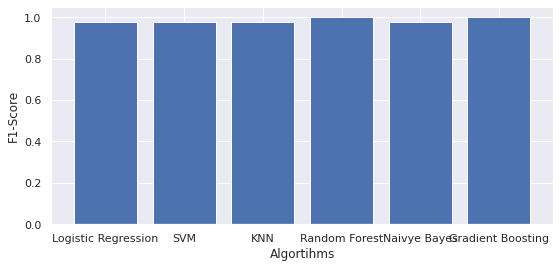

In [131]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],f1_scr,label='F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Algortihms')
plt.show()

Random forest and Gradient Boosting has highest accuracy , F1-score and ROC_AUC curve 100%